## << 문제 정의 >>

주어진 titanic dataset을 사용하여 탑승객별로 **생존 여부(Survived)**를 예측하는 문제를 풉니다.

사용할 데이터는 kaggle에서 제공하는 Titanic Data를 사용합니다. 데이터 설명은 아래 링크를 참고하세요.

평가하는 성능 지표는 예측한 Survived와 정답 Survived 사이의 **Accuracy**값으로 정의합니다.



> [Source] https://www.kaggle.com/competitions/titanic/data

In [ ]:
# 0. 라이브러리 및 데이터 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("./train.csv")
test = pd.read_csv("test.csv")
print(train.shape, test.shape)

(891, 12) (418, 11)


### Q1. train 데이터의 column별 결측치 비율과 결측치가 하나 이상 포함되어 있는 row의 수를 출력하세요.

PassengerId   -->  0.00%
Survived      -->  0.00%
Pclass        -->  0.00%
Name          -->  0.00%
Sex           -->  0.00%
Age           -->  19.87%
SibSp         -->  0.00%
Parch         -->  0.00%
Ticket        -->  0.00%
Fare          -->  0.00%
Cabin         -->  77.10%
Embarked      -->  0.22%
결측치를 포함하고 있는 row 수 :  708


<Axes: xlabel='Age', ylabel='Count'>

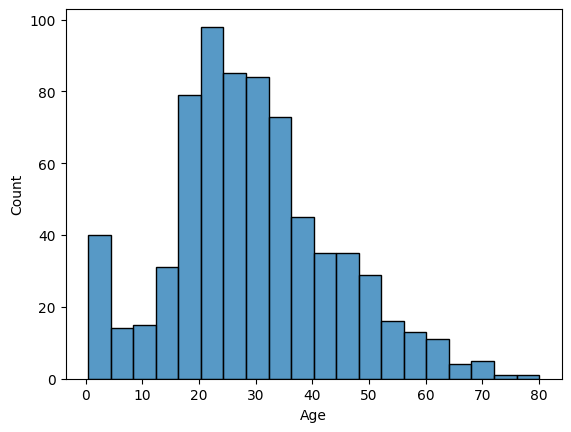

In [ ]:
# column별 결측치 비율 출력 코드
for col in train.columns:
  colname = col
  colnum = train[col].isna().sum()/train.shape[0]*100
  print("%-12s  -->  %-4.2f%%" %(colname, colnum))

# 결측치가 하나 이상 포함되어 있는 row의 수 출력 코드
print("결측치를 포함하고 있는 row 수 : ",train.isna().any(axis=1).sum())

sns.histplot(train['Age'])

### Q2. train data에 결측치가 존재하는 column들을 다음과 같은 방법으로 처리하세요.

- Age column은 Age column의 4개 구간으로 나눈다.

- Cabin column은 Cabin column 자체를 제거한다. (column drop)

- Embarked column은 "C"로 결측치를 채운다.

In [ ]:
train.loc[train.Age < 13, 'Age' ] = 'low'
train.loc[(train.Age >= 13) & (train.Age < 36), 'Age'] = 'mid1'
train.loc[(train.Age >= 36) & (train.Age < 56), 'Age'] = 'mid2'
train.loc[train.Age >= 56, 'Age' ] = 'high'
train = train.drop('Cabin', axis=1)
train.Embarked = train['Embarked'].fillna('C')
sns.histplot(train['Age'])
train

<ipython-input-93-1dab1dfabf40>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'low' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train.loc[train.Age < 13, 'Age' ] = 'low'


TypeError: '>=' not supported between instances of 'str' and 'int'